# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 

In [40]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Import libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## `Iris` dataset 

In [42]:
np.random.seed = 2021

iris = load_iris()

print ('data contains:',iris.keys())

X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [43]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
 5   label_names        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [44]:
df_iris['label_names'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Split to train and test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Train KNN classifiers for different `K`

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    print(f"\nTraining KNN with K={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Results for K={k}:")
    print(f" - Accuracy: {accuracy:.4f}")
    print(" - Classification Report:")
    print(classification_report(y_test, y_pred))


Training KNN with K=1...
Results for K=1:
 - Accuracy: 0.9556
 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Training KNN with K=3...
Results for K=3:
 - Accuracy: 0.9778
 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Training KNN with K=5...
Results for K=5:
 - Accuracy: 0.97

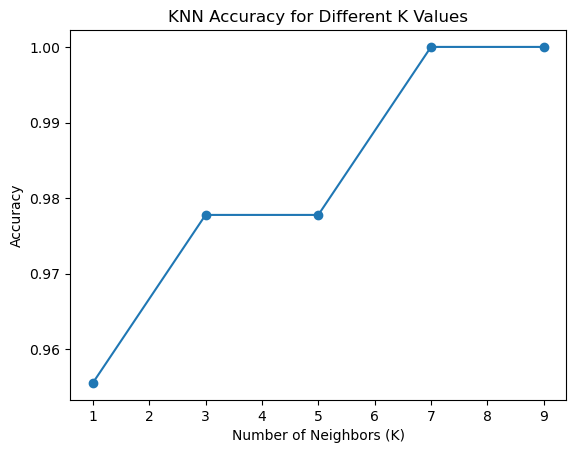

In [48]:
# Plot accuracy vs K
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

### Choose the best `K` determined on test set

In [49]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K determined from test set: {best_k}")


Best K determined from test set: 7


## Synthetic dataset 

### Generrate synthetic dataset

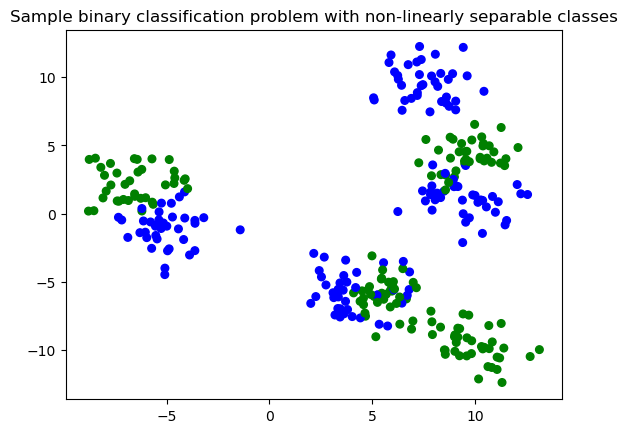

In [50]:
# Set the color scheme
cmap_bold = ListedColormap(['blue', '#FFFF00', 'black', 'green'])

# Generate a syntehtic dataset
np.random.seed = 2021

X, y = make_blobs(n_samples=300, n_features=2, centers=8, cluster_std=1.3, random_state=4)

y = y % 2 # make a two-class classification

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=30, cmap=cmap_bold)

In [51]:
# Check the dimensions
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")  # Має бути (300, 2) і (300,)


Shape of X: (300, 2), Shape of y: (300,)


#### Split to train and test

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train KNN regressors for different `K`

In [53]:
# Find the best K
k_values = range(1, 21)
best_k = None
best_score = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_k = k

print(f"The best k = {best_k}, score = {best_score:.3f}")

The best k = 16, score = 0.933


#### Train the best `K` determined on test set

In [54]:
# Training KNN with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

#### Visualize the decision boundary 

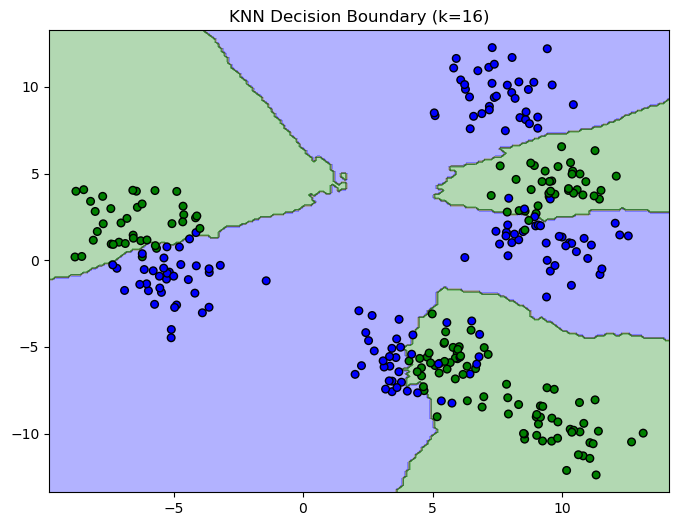

In [55]:
# Visualize the decision-making boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_bold)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap_bold, s=30)
plt.title(f'KNN Decision Boundary (k={best_k})')
plt.show()